# CS 105 Project Phase 2 - Data Cleaning and EDA

## Authors: Amirsadra Mohseni (862085035), Francisco Lagos Vilaboa (862018654)

https://data.world/datasets/drugs

### Import libraries and load the data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import statistics

%matplotlib inline

In [2]:
df_drugs = pd.read_csv('/home/csmajs/flago001/cs105-prj-phase2-eclair_/Drug_Utilization_2018_-_California.csv')
df_crawl = pd.read_csv('/home/csmajs/flago001/cs105-prj-phase2-eclair_/webmd.csv')

### Drugs data set we found online

In [3]:
df_drugs.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Suppression Used,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
0,MCOU,CA,168,20,31,2018,4,HYDRO OT 1,False,145234.499,4134.0,25281.85,25281.85,0.0,10/1,10/01/2018 12:00:00 AM,33.7712,-111.3877,"(33.7712, -111.3877)",168002031
1,FFSU,CA,93,1712,1,2018,4,WARFARIN S,False,34389.000,629.0,9594.28,9594.28,0.0,10/1,10/01/2018 12:00:00 AM,33.7712,-111.3877,"(33.7712, -111.3877)",93171201
2,MCOU,CA,13668,271,1,2018,4,CARBAMZEPI,False,65209.000,515.0,23956.24,23956.24,0.0,10/1,10/01/2018 12:00:00 AM,33.7712,-111.3877,"(33.7712, -111.3877)",13668027101
3,MCOU,CA,409,9558,10,2018,4,ROCURONIUM,True,NaN,NaN,NaN,NaN,NaN,10/1,10/01/2018 12:00:00 AM,33.7712,-111.3877,"(33.7712, -111.3877)",409955810
4,MCOU,CA,42799,806,1,2018,3,IVERMECTIN,False,5182.000,625.0,20237.53,20227.53,10.0,7/1,07/01/2018 12:00:00 AM,33.7712,-111.3877,"(33.7712, -111.3877)",42799080601


### Drugs for the data set that we crawled

In [4]:
df_crawl.head()


,BrandName,Drug,GenName,HowtoUse,Use
0,"Astelin, Astepro","Azelastine HCL Aerosol, Spray With Pump",Azelastine,Read the Patient Information Leaflet provided ...,This medication is used to relieve nasal sympt...
1,NaN,Ryvent,Carbinoxamine Maleate,"Take the tablet, capsule, or liquid form by mo...",Carbinoxamine is an antihistamine used to reli...
2,NaN,Ayvakit 300 Mg Tablet Antineoplastic - Protein...,Avapritinib,Read the Patient Information Leaflet if availa...,This medication is used to treat a certain typ...
3,NaN,Nextol SF Candy Base Powder Not Applicable,Lollipop Base No.232 (Bulk),Consult your pharmacist or physician.,Consult your pharmacist or physician.
4,NaN,Rythmol SR,Propafenone,Read the Patient Information Leaflet if availa...,This medication is used to help prevent certai...


### Data Cleaning for the data set found online

In [5]:
print('drugs df shape is: ', df_drugs.shape)

drugs df shape is:  (190666, 20)


### We dropp the useless columns

In [6]:
df_drugs = \
df_drugs.drop(columns=[ \
'Latitude', 'Longitude', 'Quarter Begin Date', 'Quarter Begin', 'State', 'Labeler Code', 'Product Code', 'Location', 'Year'])

latitude, longidtude, year, state and Location columns have been droped because they are the same for all the data rows.
Quarter Begin Date, and Quarter Begin columns are useless, we still have the Quarter column in case we analyse the quarter in which drugs are being used

In [7]:
df_drugs = df_drugs.rename(columns={"Suppression Used": "SuppressionUsed", "Package Size": "PackageSize", "Utilization Type": "UtilizationType", \
                                   "Product Name": "ProductName", "Non Medicaid Amount Reimbursed": "NonMedicaidAmountReimbursed", "Number of Prescriptions": 'NumberOfPrescriptions'})

In [8]:
df_drugs.SuppressionUsed = df_drugs.SuppressionUsed.astype(int)
df_drugs.head()

,UtilizationType,PackageSize,Quarter,ProductName,SuppressionUsed,Units Reimbursed,NumberOfPrescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,NonMedicaidAmountReimbursed,NDC
0,MCOU,31,4,HYDRO OT 1,0,145234.499,4134.0,25281.85,25281.85,0.0,168002031
1,FFSU,1,4,WARFARIN S,0,34389.000,629.0,9594.28,9594.28,0.0,93171201
2,MCOU,1,4,CARBAMZEPI,0,65209.000,515.0,23956.24,23956.24,0.0,13668027101
3,MCOU,10,4,ROCURONIUM,1,NaN,NaN,NaN,NaN,NaN,409955810
4,MCOU,1,3,IVERMECTIN,0,5182.000,625.0,20237.53,20227.53,10.0,42799080601


In the df_drugs data set we have Utilization Type column which MCOU is the risk-based managed care, and ffsu is fee for service.

In [9]:
df_drugs.info()
print('\n')
df_drugs.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190666 entries, 0 to 190665
Data columns (total 11 columns):
UtilizationType                190666 non-null object
PackageSize                    190666 non-null int64
Quarter                        190666 non-null int64
ProductName                    190666 non-null object
SuppressionUsed                190666 non-null int64
Units Reimbursed               109360 non-null float64
NumberOfPrescriptions          109360 non-null float64
Total Amount Reimbursed        109360 non-null float64
Medicaid Amount Reimbursed     109360 non-null float64
NonMedicaidAmountReimbursed    109360 non-null float64
NDC                            190666 non-null int64
dtypes: float64(5), int64(4), object(2)
memory usage: 16.0+ MB




UtilizationType                    0
PackageSize                        0
Quarter                            0
ProductName                        0
SuppressionUsed                    0
Units Reimbursed               81306
NumberOfPrescriptions          81306
Total Amount Reimbursed        81306
Medicaid Amount Reimbursed     81306
NonMedicaidAmountReimbursed    81306
NDC                                0
dtype: int64

For the data set df_drugs we see that suppresive drugs do not have any data for the columns: "Units Reimbursed", "NumberOfPrescriptions", "Total Amount Reimbursed", "NOnMedicaidAmountReimbursed".

# EDA for the data set we found online

The maximum PackageSize is: 99
The mininimum PackageSize is: 0
The mean value for the PackageSizes is: 22.996617121038884
The mode of the Package Size is 1
The median for the Package Size is 10.0
The standard deviation number of the Package Size is: 27.32846337204882


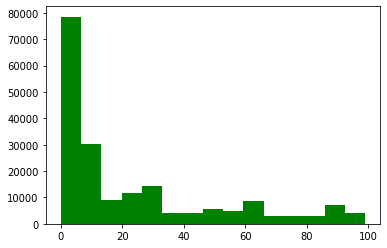

In [10]:
maximumNum = df_drugs['PackageSize'].max()
print("The maximum PackageSize is:", maximumNum)

minimumNum = df_drugs['PackageSize'].min()
print("The mininimum PackageSize is:", minimumNum)

mean = df_drugs["PackageSize"].mean()
print("The mean value for the PackageSizes is:", mean)

mode = statistics.mode(df_drugs['PackageSize'])
print("The mode of the Package Size is", mode)

median = statistics.median(df_drugs['PackageSize'])
print("The median for the Package Size is", median)

std = df_drugs["PackageSize"].std()
print("The standard deviation number of the Package Size is:", std)

n, bins, patches = plt.hist(df_drugs['PackageSize'], 15, facecolor='green')
plt.show()

The data for the average package of the drugs is positively skewed in a significant amount

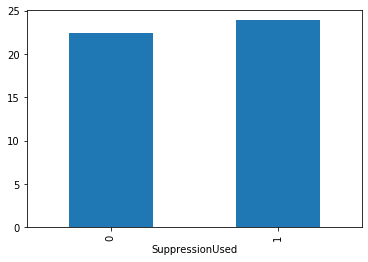

In [11]:
df_drugs.groupby(['SuppressionUsed'])['PackageSize'].mean().plot.bar()

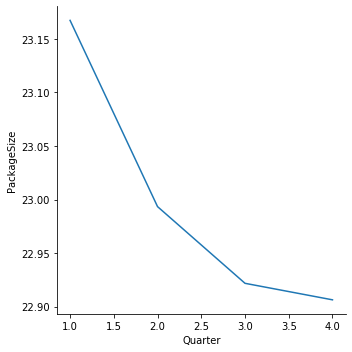

In [12]:
sns.relplot(x="Quarter", y="PackageSize", ci=None, kind="line", data=df_drugs);

This graph shows how in the different quarter of the years the package size of the drugs starts being bigger and as the year goes the package size is being reduced


In [13]:
tdf = df_drugs.drop(columns=['ProductName', 'NDC', 'Quarter', 'SuppressionUsed'])
tdf = tdf.dropna()
tdf

,UtilizationType,PackageSize,Units Reimbursed,NumberOfPrescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,NonMedicaidAmountReimbursed
0,MCOU,31,145234.499,4134.0,25281.85,25281.85,0.00
1,FFSU,1,34389.000,629.0,9594.28,9594.28,0.00
2,MCOU,1,65209.000,515.0,23956.24,23956.24,0.00
4,MCOU,1,5182.000,625.0,20237.53,20227.53,10.00
5,MCOU,5,641156.500,11256.0,80995.69,80529.92,465.77
...,...,...,...,...,...,...,...
190649,FFSU,16,26590.000,667.0,2811.09,2811.09,0.00
190650,FFSU,50,53665.000,997.0,15297.69,15297.23,0.46
190651,FFSU,6,7478.000,1324.0,31091.44,30694.56,396.88
190653,FFSU,60,2880.000,47.0,2307.96,2307.96,0.00


This barcode that the average package size for suppressed drugs is bigger than the average package size for non suppresive drugs

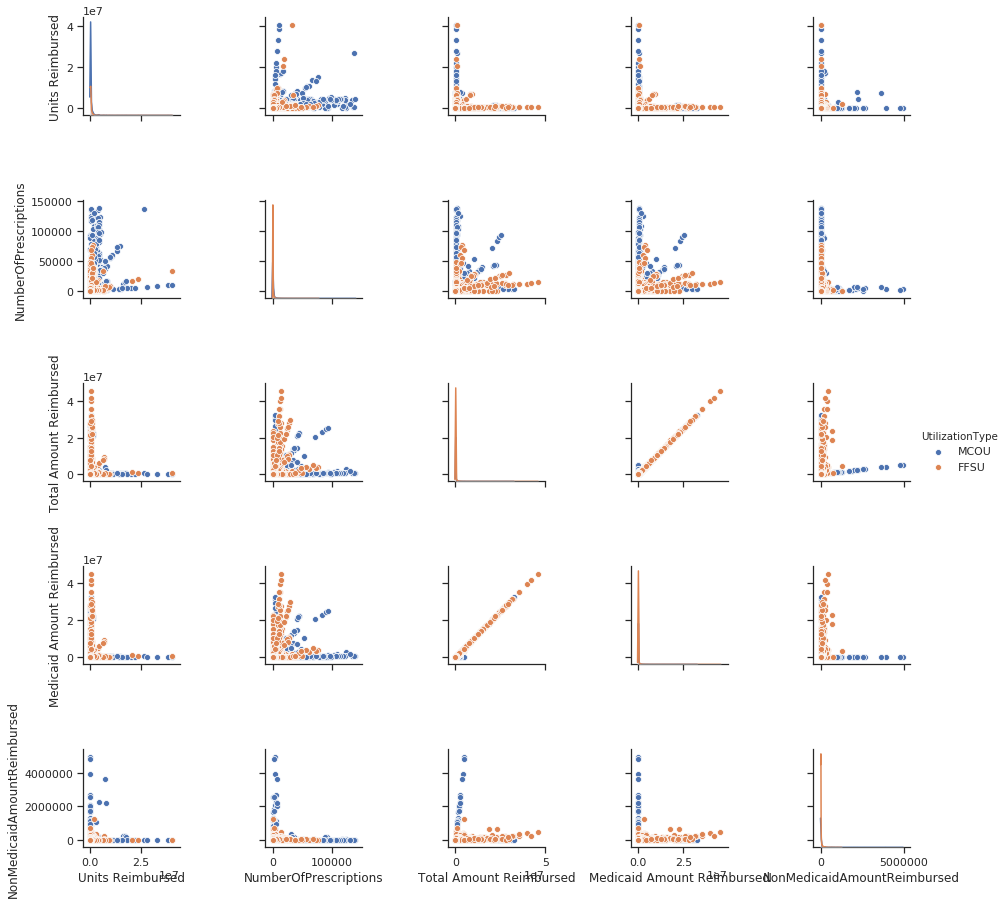

In [14]:
tempDf = df_drugs.drop(columns=['ProductName', 'NDC', 'Quarter', 'SuppressionUsed', 'PackageSize'])
tempDf = tempDf.dropna()
indexNames = df_drugs[ df_drugs["NumberOfPrescriptions"] >= 150000.00 ].index
tempDf.drop(indexNames , inplace=True)
indexNames = df_drugs[ df_drugs["NonMedicaidAmountReimbursed"] >= 6000000.00 ].index
tempDf.drop(indexNames , inplace=True)
sns.set(style="ticks")
sns.pairplot(tempDf, hue="UtilizationType")

After dropping some outliers and printing the scatterplox matrix, we can see that there is a high correlation between the medicaid amount reimbursed and the total amount reimbursed, which means that one of this columns is redundant. Also the medicaid amount reimbursed is somewhat correlated to the Number of prescriptions. All other scatterplots only show sparse relations between columns

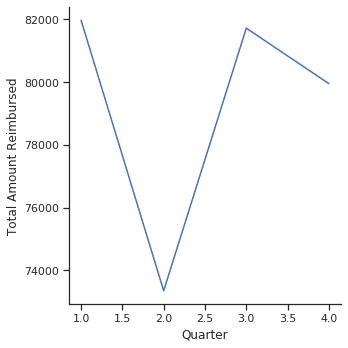

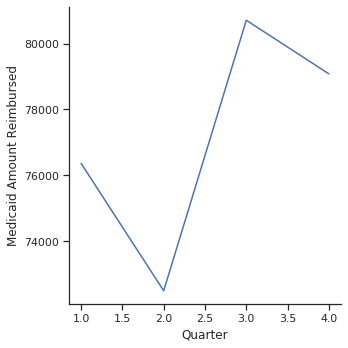

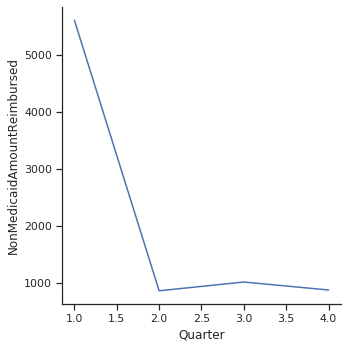

In [15]:
sns.relplot(x="Quarter", y="Total Amount Reimbursed", ci=None, kind="line", data=df_drugs);
sns.relplot(x="Quarter", y="Medicaid Amount Reimbursed", ci=None, kind="line", data=df_drugs);
sns.relplot(x="Quarter", y="NonMedicaidAmountReimbursed", ci=None, kind="line", data=df_drugs);

As in the scatterplox above we can se how the graphs for medicaid reimbursment and the total amount reimbursed are very similar, that is because they are highly correlated, in fact it is possible that most of the total amounts being reimbursed are the same as the medicaid amount reimbursed. We do see a difference of values in the first quarter of the year, and we can see in the non medicad amount reimbursed graph that the first quarter is where this happens, with very  low numbers of non medicaid amount reimbursed for the second third and fourth quarter

In [16]:
df_crawl.head()

,BrandName,Drug,GenName,HowtoUse,Use
0,"Astelin, Astepro","Azelastine HCL Aerosol, Spray With Pump",Azelastine,Read the Patient Information Leaflet provided ...,This medication is used to relieve nasal sympt...
1,NaN,Ryvent,Carbinoxamine Maleate,"Take the tablet, capsule, or liquid form by mo...",Carbinoxamine is an antihistamine used to reli...
2,NaN,Ayvakit 300 Mg Tablet Antineoplastic - Protein...,Avapritinib,Read the Patient Information Leaflet if availa...,This medication is used to treat a certain typ...
3,NaN,Nextol SF Candy Base Powder Not Applicable,Lollipop Base No.232 (Bulk),Consult your pharmacist or physician.,Consult your pharmacist or physician.
4,NaN,Rythmol SR,Propafenone,Read the Patient Information Leaflet if availa...,This medication is used to help prevent certai...


## Data Cleaning for the data set we crawled

### Drop Columns

In [17]:
df_crawl = df_crawl.drop(columns=['BrandName'])

In [18]:
df_crawl = df_crawl.dropna()

In [19]:
print('crawl df shape is: ', df_crawl.shape)

crawl df shape is:  (18820, 4)


In [20]:
df_crawl.info()
print('\n')
df_crawl.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18820 entries, 0 to 18958
Data columns (total 4 columns):
Drug        18820 non-null object
GenName     18820 non-null object
HowtoUse    18820 non-null object
Use         18820 non-null object
dtypes: object(4)
memory usage: 735.2+ KB




Drug        0
GenName     0
HowtoUse    0
Use         0
dtype: int64

In [21]:
df_crawl

,Drug,GenName,HowtoUse,Use
0,"Azelastine HCL Aerosol, Spray With Pump",Azelastine,Read the Patient Information Leaflet provided ...,This medication is used to relieve nasal sympt...
1,Ryvent,Carbinoxamine Maleate,"Take the tablet, capsule, or liquid form by mo...",Carbinoxamine is an antihistamine used to reli...
2,Ayvakit 300 Mg Tablet Antineoplastic - Protein...,Avapritinib,Read the Patient Information Leaflet if availa...,This medication is used to treat a certain typ...
3,Nextol SF Candy Base Powder Not Applicable,Lollipop Base No.232 (Bulk),Consult your pharmacist or physician.,Consult your pharmacist or physician.
4,Rythmol SR,Propafenone,Read the Patient Information Leaflet if availa...,This medication is used to help prevent certai...
...,...,...,...,...
18954,Well Beginnings Training Pants Not Applicable,"Diaper,Brief,Infant-Todd,Disp",Consult your pharmacist or physician.,Consult your pharmacist or physician.
18955,Well Beginnings Diapers Not Applicable,"Diaper,Brief,Infant-Todd,Disp",Consult your pharmacist or physician.,Consult your pharmacist or physician.
18956,"Weed Pollen-Short Ragweed Tablet, Sublingual",Weed Pollen-Short Ragweed,Read the Medication Guide provided by your pha...,This medication is used to treat certain aller...
18957,Welchol 625 Mg Tablet,Colesevelam,"Take this medication by mouth with a meal, usu...",This medication is used along with a proper di...


In [22]:
df_crawl.groupby(['Drug'])['Drug'].count()


Drug
A + D Ointment                                   1
A And D Diaper Rash Cream                        1
A Thru Z                                         1
A Thru Z 18 Mg-500 Mcg-300 Mcg-250 Mcg Tablet    1
A Thru Z Advanced Formula                        1
                                                ..
perphenazine                                     1
promethazine HCL                                 1
promethazine HCL Ampul                           1
ramipril                                         1
valsartan-hydrochlorothiazide                    1
Name: Drug, Length: 18316, dtype: int64

In [23]:
use = df_crawl['Use'].value_counts().idxmax()
print('most common use is: ', use)

most common use is:  Consult your pharmacist or physician.


"Consult your pharmacist or physician" is the most common use for drugs. But since this is not an actual use, We will drop this rows and check for the remaining drugs.

In [24]:
dfT2 = df_crawl[df_crawl.Use != 'Consult your pharmacist or physician.']
use = dfT2['Use'].value_counts().idxmax()
print('most common use of the listed drugs is: ', use)
dfT2 = dfT2[(dfT2['Use'] == use)]
dfT2

most common use of the listed drugs is:  This medication is a multivitamin product used to treat or prevent vitamin deficiency due to poor diet, certain illnesses, or during pregnancy. Vitamins are important building blocks of the body and help keep you in good health.


,Drug,GenName,HowtoUse,Use
15,MVW Complete FORMULTN Multivit,"Pediatric Multivit 22-D3-Vit K, Pediatric Mult...","Take this medication by mouth, usually once da...",This medication is a multivitamin product used...
16,"MVW Complete Formulation D5000 5,000 Unit-1,00...","Pediatric Multivit 22-D3-Vit K, Pediatric Mult...","Chew this medication thoroughly and swallow, u...",This medication is a multivitamin product used...
18,MVW Complete Formulation D3000 Capsule,"Pediatric Multivit 22-D3-Vit K, Pediatric Mult...","Take this medication by mouth, usually once da...",This medication is a multivitamin product used...
19,"MVW Complete FORMULTN Multivit Tablet, Chewable","Pediatric Multivit 22-D3-Vit K, Pediatric Mult...","Chew this medication thoroughly and swallow, u...",This medication is a multivitamin product used...
20,MVW Complete Formulation D3000,"Pediatric Multivit 22-D3-Vit K, Pediatric Mult...","Chew this medication thoroughly and swallow, u...",This medication is a multivitamin product used...
...,...,...,...,...
18492,Vinate One,"Prenatal Vit27,Calcium-Iron-Fa","Take this medication by mouth, usually once da...",This medication is a multivitamin product used...
18542,VIC-Forte,Multivitamin With Min No.7-Fa,"Take this medication by mouth, usually once da...",This medication is a multivitamin product used...
18723,V-C Forte,"Multivitamin With Min No.7-Fa, Multivitamin,Tx...","Take this medication by mouth, usually once da...",This medication is a multivitamin product used...
18770,Ultra Freeda Tablet Multivitamins,"Multivit-Iron-Fa-Calcium-Mins, Multivit,Calciu...","Take this medication by mouth, usually once da...",This medication is a multivitamin product used...


If wee look at the table we can clearyly see that this drug is a multivitamin.